## EFIx_LP product access

In [1]:
# load data from VirES server

from viresclient import SwarmRequest

#request = SwarmRequest("https://staging.viresdisc.vires.services/openows")
request = SwarmRequest(
    "https://testing.vires.services/ows",
    username=..., password=...
)
request.set_collection("SW_OPER_EFIA_LP_1B")
request.set_products(
    measurements=[
        'U_orbit', 'Ne', 'Te', 'Vs',
        'Ne_error', 'Te_error', 'Vs_error',
        'Flags_LP', 'Flags_Ne', 'Flags_Te', 'Flags_Vs',
    ],
    auxiliaries=[],
    sampling_step="PT1S" 
)
data = request.get_between(
    start_time="2018-09-15T00:00:00Z",
    end_time="2018-09-16T00:00:00Z"
).as_xarray()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (8.042MB)


In [2]:
print(data)

<xarray.Dataset>
Dimensions:     (Timestamp: 86388)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2018-09-15T00:00:00.197000027 ... 2018-09-15T23:59:59.197000027
Data variables:
    Spacecraft  (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 75.19 75.26 75.32 ... -47.39 -47.45 -47.52
    Longitude   (Timestamp) float64 20.77 20.81 20.85 ... -167.8 -167.8 -167.8
    Radius      (Timestamp) float64 6.805e+06 6.805e+06 ... 6.823e+06 6.823e+06
    U_orbit     (Timestamp) float64 7.63e+03 7.63e+03 ... 7.62e+03 7.62e+03
    Ne          (Timestamp) float64 1.881e+04 1.916e+04 ... 3.337e+04 3.323e+04
    Te          (Timestamp) float64 2.665e+03 2.737e+03 ... 3.162e+03 3.158e+03
    Vs          (Timestamp) float64 -1.412 -1.448 -1.467 ... -1.813 -1.813
    Ne_error    (Timestamp) float64 1e+10 1e+10 1e+10 ... 1e+10 1e+10 1e+10
    Te_error    (Timestamp) float64 1e+10 1e+10 1e+10 ... 1e+10 1e+10 1e+10
    Vs_error    (Timestamp) flo

In [3]:
# extrat times, coordinates and other data

from numpy import asarray, datetime64, stack

NS2DAYS = 1.0/(24*60*60*1e9) # nano seconds to days scale factor

# time as MJD2000
times = (
    asarray(data["Timestamp"], dtype="M8[ns]") - datetime64('2000')
).astype('int64') * NS2DAYS


ne = data["Ne"].values
te = data["Te"].values
vs = data["Vs"].values
uorb = data["U_orbit"].values

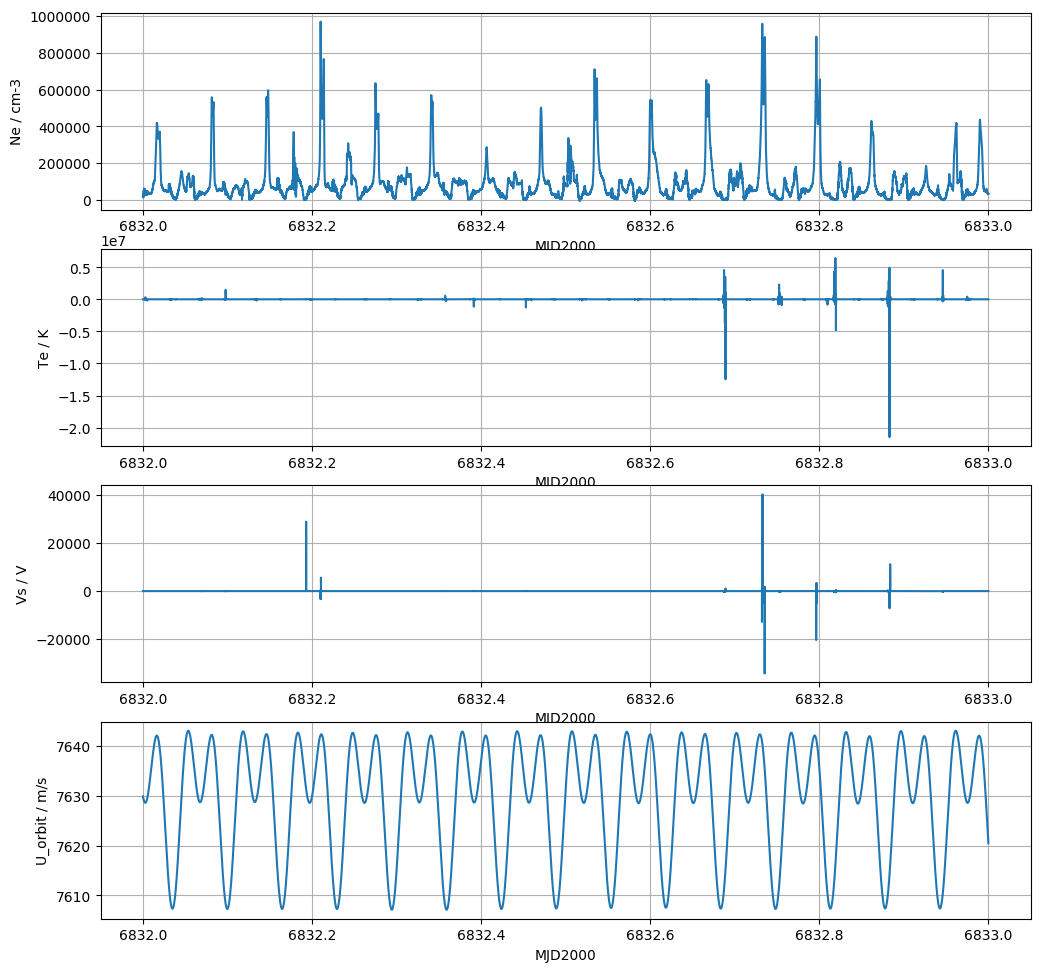

In [5]:
# display residuals

from matplotlib.pyplot import figure, subplot, show


fig = figure(figsize=(12, 12), dpi=100)

ax = subplot(411)
ax.plot(times, ne)
ax.grid()
ax.set_xlabel('MJD2000')
ax.set_ylabel('Ne / cm-3')

ax = subplot(412)
ax.plot(times, te)
ax.grid()
ax.set_xlabel('MJD2000')
ax.set_ylabel('Te / K')

ax = subplot(413)
ax.plot(times, vs)
ax.grid()
ax.set_xlabel('MJD2000')
ax.set_ylabel('Vs / V')

ax = subplot(414)
ax.plot(times, uorb)
ax.grid()
ax.set_xlabel('MJD2000')
ax.set_ylabel('U_orbit / m/s')

show()